# Model K-means

This Jupyter notebook is used to:

1. Run PCA.
2. Run K-means.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.26932,0.21762,0.00011,0.75045,0.00625,0.00004,0.00001,0.00675,0.00000,...,3694,9,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:06:35.060859Z
1,1.00000,0.84205,0.21874,0.02370,0.75054,0.00932,0.00007,0.00002,0.00675,0.00000,...,4812,12,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:06:37.071614Z
2,1.00000,0.74843,0.17379,0.00000,0.75051,0.00000,0.00000,0.00000,0.00208,0.00000,...,180,2,udp,dns,SHR,orig_reg_or_dyn,resp_well_known,No,Yes,2017-07-06T12:05:16.358339Z
3,1.00000,0.74843,0.15288,0.00000,0.75027,0.00084,0.00001,0.00000,0.00592,0.00000,...,382,2,udp,none,SF,orig_reg_or_dyn,resp_well_known,No,No,2017-07-06T12:04:38.814779Z
4,1.00000,0.74843,0.21762,0.00000,0.81909,0.00034,0.00000,0.00000,0.00079,0.00000,...,540,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:06:35.056945Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.74843,0.27479,0.00002,0.93540,0.00018,0.00000,0.00000,0.00079,0.00000,...,85,1,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:08:17.706579Z
1,1.00000,0.74843,0.83822,0.00000,0.79542,0.00033,0.00000,0.00000,0.00079,0.00000,...,204,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:25:09.381801Z
2,1.00000,0.74843,0.48239,0.00000,0.77464,0.00036,0.00000,0.00000,0.00079,0.00000,...,244,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:14:30.474114Z
3,1.00000,0.74843,0.79827,0.00005,0.89625,0.00034,0.00000,0.00000,0.00079,0.00000,...,262,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:23:57.658393Z
4,1.00000,0.74843,0.13824,0.03876,0.74549,0.03239,0.00043,0.00007,0.04986,0.00000,...,19702,53,tcp,none,S1,orig_reg_or_dyn,resp_reg,No,No,2017-07-06T12:04:12.520077Z


In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 21876 rows and 294 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_p_cat_orig_reg_or_dyn,orig_p_cat_orig_well_known,resp_p_cat_resp_123,resp_p_cat_resp_21,resp_p_cat_resp_22,resp_p_cat_resp_443,resp_p_cat_resp_53,resp_p_cat_resp_80,resp_p_cat_resp_dyn,resp_p_cat_resp_reg,resp_p_cat_resp_well_known,connection.proto_icmp,connection.proto_tcp,connection.proto_udp,connection.service_dce_rpc,connection.service_dns,connection.service_ftp,connection.service_ftp-data,connection.service_http,connection.service_krb,"connection.service_krb,smb,gssapi",connection.service_krb_tcp,connection.service_none,"connection.service_ntlm,gssapi,smb",connection.service_ntp,"connection.service_smb,gssapi","connection.service_smb,gssapi,dce_rpc",connection.service_ssh,connection.service_ssl,connection.conn_state_OTH,connection.conn_state_REJ,connection.conn_state_RSTO,connection.conn_state_RSTR,connection.conn_state_RSTRH,connection.conn_state_S0,connection.conn_state_S1,connection.conn_state_S3,connection.conn_state_SF,connection.conn_state_SHR,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_connection.protocol_mode_icmp,orig_orig_connection.protocol_mode_tcp,orig_orig_connection.protocol_mode_udp,orig_orig_connection.service_mode_dns,orig_orig_connection.service_mode_http,orig_orig_connection.service_mode_none,orig_orig_connection.service_mode_ntp,orig_orig_connection.service_mode_ssl,orig_orig_connection.conn_state_mode_OTH,orig_orig_connection.conn_state_mode_REJ,orig_orig_connection.conn_state_mode_SF,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_connection.protocol_mode_-,orig_resp_connection.protocol_mode_tcp,orig_resp_connection.protocol_mode_udp,orig_resp_connection.service_mode_-,orig_resp_connection.service_mode_dns,orig_resp_connection.service_mode_ftp,orig_resp_connection.service_mode_none,orig_resp_connection.service_mode_ntp,orig_resp_connection.service_mode_ssh,orig_resp_connection.conn_state_mode_-,orig_resp_connection.conn_state_mode_S0,orig_resp_connection.conn_state_mode_SF,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_r

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SHR'],
      dtype='object', length=205)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 205 principal components: 1.0000000000000009


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999999]
Variance Captured by First  10 Principal Components: [0.90341389]
Variance Captured by First   7 Principal Components: [0.86357117]
Variance Captured by First   5 Principal Components: [0.81952844]
Variance Captured by First   2 Principal Components: [0.70824904]
Variance Captured by the First Principal Component:  [0.58753284]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.35700539
Variance of connection.duration                       : 0.23052745
Variance of connection.orig_p                         : 0.06872066
Variance of connection.orig_bytes                     : 0.05199553
Variance of connection.orig_pkts                      : 0.04333059
Variance of connection.resp_p                         : 0.03796222
Variance of connection.resp_bytes                     : 0.02998659
Variance of connection.resp_pkts                      : 0.02375135
Variance of dns_count                                 : 0.02029138
Variance of ssh_count                                 : 0.01586917
Variance of http_count                                : 0.01300446
Variance of ssl_count                                 : 0.01096909
Variance of files_count                               : 0.00874714
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00838907
Variance of orig_p_cat_orig_well_known                : 0.0070

## 2. K-means

In [16]:
from datetime import datetime
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans

# Choose optimal K using Elbow method
score = []
inertia = []
print_info = []
computed_clusters = []
computed_clusters_fitted = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 25):
    try:
        km = KMeans(
            n_clusters=cluster, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        km_fitted = km.fit(pca_X)
        y_km = km.fit_predict(pca_X)
        computed_clusters.append(km)
        computed_clusters_fitted.append(km_fitted)
        score.append(km.score(pca_X))
        inertia.append(km.inertia_)
        print_str = 'Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S"))
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:30:20.
Cluster initiation:  1 (00:30:22)
Cluster initiation:  2 (00:30:24)
Cluster initiation:  3 (00:30:27)
Cluster initiation:  4 (00:30:31)
Cluster initiation:  5 (00:30:35)
Cluster initiation:  6 (00:30:39)
Cluster initiation:  7 (00:30:43)
Cluster initiation:  8 (00:30:47)
Cluster initiation:  9 (00:30:51)
Cluster initiation: 10 (00:30:57)
Cluster initiation: 11 (00:31:02)
Cluster initiation: 12 (00:31:07)
Cluster initiation: 13 (00:31:12)
Cluster initiation: 14 (00:31:17)
Cluster initiation: 15 (00:31:23)
Cluster initiation: 16 (00:31:29)
Cluster initiation: 17 (00:31:35)
Cluster initiation: 18 (00:31:40)
Cluster initiation: 19 (00:31:47)
Cluster initiation: 20 (00:31:54)
Cluster initiation: 21 (00:32:00)
Cluster initiation: 22 (00:32:08)
Cluster initiation: 23 (00:32:14)
Cluster initiation: 24 (00:32:19)
Done at 00:32:19.


In [17]:
score

[-236441.1969977165,
 -159631.06190958066,
 -107239.6062529845,
 -92342.79262953,
 -85203.91143266734,
 -76302.0286839709,
 -68080.67695078641,
 -64298.4101812769,
 -61683.29039113191,
 -56111.85345486047,
 -53766.35916128134,
 -48764.413127668384,
 -45991.157592801464,
 -44530.16402016774,
 -43306.24177790215,
 -42302.18936369804,
 -41430.99808562405,
 -39603.32448293676,
 -39192.09143344524,
 -37896.39396824045,
 -37742.81728822337,
 -35780.77955750668,
 -36656.86440728487,
 -35778.53501264018]

In [18]:
inertia

[236441.1969977165,
 159631.06190958066,
 107239.6062529845,
 92342.79262953,
 85203.91143266734,
 76302.0286839709,
 68080.67695078641,
 64298.4101812769,
 61683.29039113191,
 56111.85345486047,
 53766.35916128134,
 48764.413127668384,
 45991.157592801464,
 44530.16402016773,
 43306.24177790214,
 42302.18936369804,
 41430.99808562405,
 39603.32448293676,
 39192.09143344524,
 37896.39396824045,
 37742.81728822337,
 35780.77955750668,
 36656.86440728488,
 35778.53501264018]

In [19]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': inertia})

In [20]:
df_cost

,Cluster,Cost
0,1,236441.19700
1,2,159631.06191
2,3,107239.60625
3,4,92342.79263
4,5,85203.91143
5,6,76302.02868
6,7,68080.67695
7,8,64298.41018
8,9,61683.29039
9,10,56111.85345


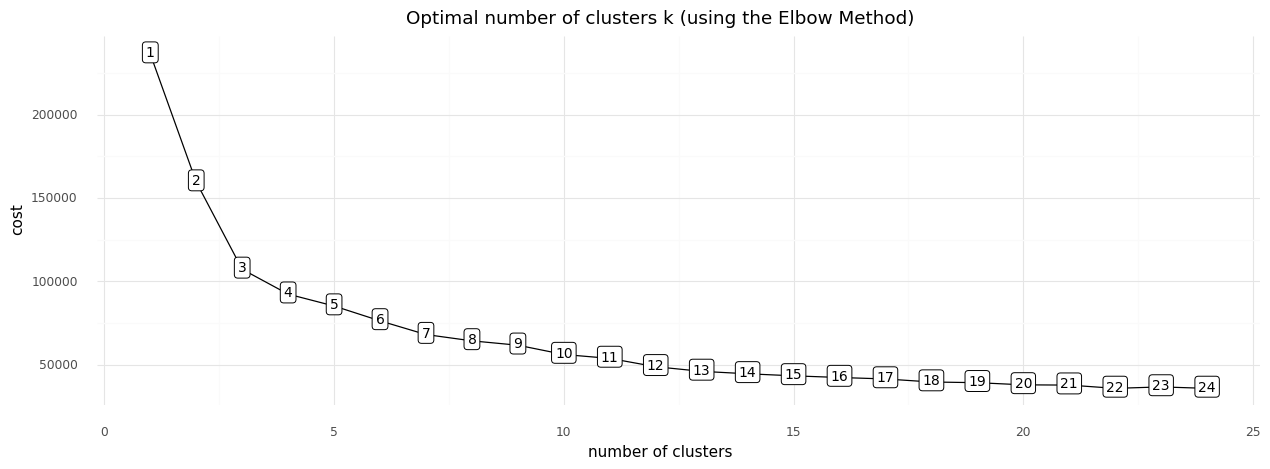

<ggplot: (8727262046371)>

In [21]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [70]:
# Fit the cluster
OPTIMAL_K = 2

kmeans = computed_clusters[OPTIMAL_K]

In [71]:
# Cluster centorid
kmeans.cluster_centers_

array([[-1.91760474e+00, -5.77814327e-01,  3.36231255e-02,
         6.45102089e-02, -9.57192071e-04, -3.15199194e-03,
         7.60676373e-02, -2.83696203e-02,  7.30937490e-04,
         2.34787207e-02, -1.95957113e-02,  1.12285119e-02,
        -2.19262927e-02, -2.46811553e-04,  1.42679542e-02,
         6.26381134e-04,  1.04964407e-02,  8.17374585e-03,
        -7.29904734e-04, -3.73321870e-03, -4.88862448e-03,
        -2.46657911e-03,  1.01848372e-03,  2.83533680e-03,
         1.42880438e-03, -2.44072593e-03,  1.62725349e-03,
         3.26969998e-03, -1.60670552e-03,  8.61905469e-04,
         3.79281053e-03,  1.88717021e-03,  1.17026306e-03,
        -2.02865732e-04, -1.10273616e-03,  2.97202845e-03,
         1.41073966e-03,  2.06633847e-03, -8.71933556e-04,
         4.81838873e-04,  4.19432593e-04,  7.84607895e-04,
        -1.09545020e-03,  6.79714055e-05, -2.37493439e-04,
         8.04899206e-04, -7.07991457e-05, -1.43834232e-03,
         6.96226533e-04,  8.23059892e-04,  5.42406014e-0

In [72]:
# Check the iteration of the clusters created
kmeans.n_iter_

6

In [73]:
# Check the cost of the clusters created
kmeans.inertia_

107239.6062529845

In [74]:
# Add cluster labels to original dataframe
pca_X['cluster'] = kmeans.labels_
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [75]:
pca_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,cluster,cluster_cat
0,0.70266,2.86510,-0.14030,-0.17471,-0.86183,0.02690,0.69506,0.47203,-0.08814,-0.08289,0.23140,-0.12524,0.13673,-0.10749,0.04663,0.19186,-0.06461,-0.05230,-0.02447,-0.06487,0.06451,0.05226,0.05107,-0.03804,-0.00695,-0.00421,-0.00313,0.04651,-0.00789,0.00141,0.03119,0.01363,-0.01510,-0.02380,-0.00611,-0.00527,0.02781,-0.00609,-0.02556,0.04096,0.02188,0.03855,-0.06365,-0.12289,0.03907,-0.13156,0.08131,0.03104,-0.01146,0.06367,-0.00489,0.00189,0.05743,-0.03999,-0.04397,-0.01127,-0.01454,-0.00219,-0.07219,-0.09467,0.01047,-0.00193,-0.01017,0.00460,-0.02148,-0.00678,0.00298,-0.00652,-0.00117,0.00816,0.01862,0.00622,0.01084,-0.00890,0.00101,-0.00423,0.00817,0.01753,0.00606,0.00576,0.00895,0.00975,0.00816,-0.00544,0.02133,0.00694,-0.01139,0.00058,-0.01901,-0.01623,0.04515,-0.02702,0.01127,-0.03256,0.01465,-0.00545,-0.01039,0.01921,-0.01745,-0.00226,0.00515,0.00155,0.00433,-0.00548,-0.00023,0.00506,0.01562,-0.00245,-0.00179,0.00018,0.00082,0.00105,-0.00030,-0.00062,0.00312,0.00018,0.00031,0.00068,-0.00026,0.00008,0.00029,-0.00050,0.00292,-0.00004,-0.00104,-0.00268,0.00472,0.00025,0.00337,0.00009,0.00126,0.00078,0.00045,-0.00012,0.00037,-0.00173,-0.00068,-0.00019,-0.00001,-0.00004,-0.00405,0.00191,0.00066,0.00243,-0.00107,0.00040,0.00098,0.00008,0.00000,-0.00005,-0.00004,0.00002,0.00003,-0.00001,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,1,1
1,-2.18670,-0.62536,-0.62094,-0.24626,0.50978,-0.81732,-0.14478,0.25306,0.10098,0.09772,-0.07385,0.07196,0.25098,-0.29174,0.33907,-0.03904,-0.09772,0.06011,0.01888,-0.03323,-0.02836,-0.07007,-0.05074,0.05539,0.01233,-0.02223,0.00130,0.01907,-0.01038,0.00293,-0.01418,0.01526,-0.01052,-0.02175,-0.01497,-0.02461,0.00316,-0.05679,0.00542,0.00388,-0.01483,-0.01796,-0.01431,0.00742,0.00925,0.01004,-0.00491,0.00229,-0.00252,0.03362,0.01416,0.00042,0.00294,0.00651,0.00300,-0.00400,0.00461,-0.01080,0.00763,0.01027,0.00360,-0.00504,0.00456,0.00792,-0.00526,0.01817,0.00151,-0.01301,-0.01012,-0.00055,-0.00888,-0.00711,0.00142,-0.00141,0.00354,-0.00659,0.01478,0.00225,-0.00136,0.00349,-0.00884,-0.00493,-0.01298,0.00837,-0.00198,-0.00095,-0.02505,0.01437,0.00785,-0.00132,0.00505,0.00188,-0.00850,0.00840,-0.00755,0.00144,-0.00219,-0.00191,-0.00976,0.00198,0.00504,-0.00259,0.01124,-0.00833,0.00129,0.00676,0.00881,0.00734,0.00575,-0.00278,0.00253,-0.00913,-0.01263,0.00495,-0.00284,-0.00559,0.00297,-0.00559,-0.00333,0.00078,0.00005,0.00191,0.00276,-0.00009,-0.00291,-0.00160,0.00374,0.00010,0.00318,-0.00050,-0.00290,0.00476,-0.00027,-0.00197,-0.00127,0.00215,-0.00034,0.00059,-0.00019,-0.00012,0.00102,0.00077,-0.00204,-0.00107,-0.00057,-0.00004,-0.00012,0.00126,0.00111,0.00017,-0.00008,-0.00025,0.00004,0.00003,0.00000,0.00001,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.0

In [76]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 197,           198,           199,           200,
                 201,           202,           203,           204,
           'cluster', 'cluster_cat'],
      dtype='object', length=207)

In [77]:
pca_X['cluster'].value_counts()

0    10192
2     7329
1     4355
Name: cluster, dtype: int64

## 3. Results

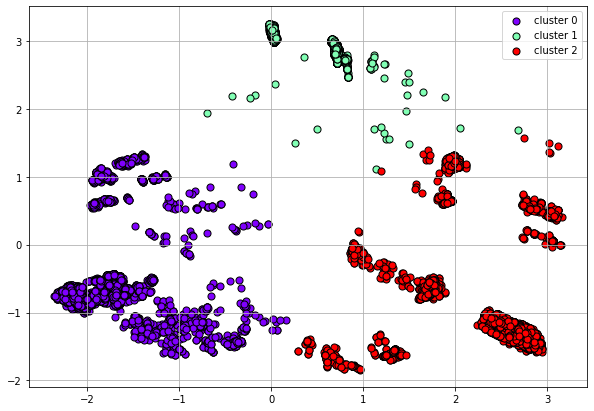

In [78]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

plt.rcParams["figure.figsize"] = (10,7)
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kmeans.labels_ == i, 0], pca_X_array[kmeans.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [79]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kmeans.labels_ == i, 0], 
                   pca_X_array[kmeans.labels_ == i, 1], 
                   pca_X_array[kmeans.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

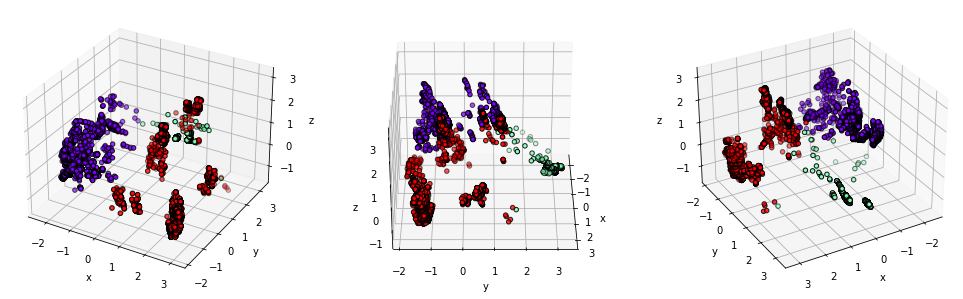

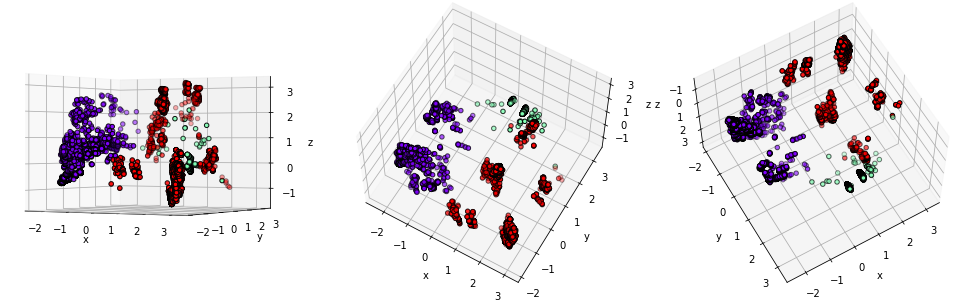

In [80]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [81]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [82]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,cluster,cluster_cat,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,0.70266,2.86510,-0.14030,-0.17471,-0.86183,0.02690,0.69506,0.47203,-0.08814,-0.08289,0.23140,-0.12524,0.13673,-0.10749,0.04663,0.19186,-0.06461,-0.05230,-0.02447,-0.06487,0.06451,0.05226,0.05107,-0.03804,-0.00695,-0.00421,-0.00313,0.04651,-0.00789,0.00141,0.03119,0.01363,-0.01510,-0.02380,-0.00611,-0.00527,0.02781,-0.00609,-0.02556,0.04096,0.02188,0.03855,-0.06365,-0.12289,0.03907,-0.13156,0.08131,0.03104,-0.01146,0.06367,-0.00489,0.00189,0.05743,-0.03999,-0.04397,-0.01127,-0.01454,-0.00219,-0.07219,-0.09467,0.01047,-0.00193,-0.01017,0.00460,-0.02148,-0.00678,0.00298,-0.00652,-0.00117,0.00816,0.01862,0.00622,0.01084,-0.00890,0.00101,-0.00423,0.00817,0.01753,0.00606,0.00576,0.00895,0.00975,0.00816,-0.00544,0.02133,0.00694,-0.01139,0.00058,-0.01901,-0.01623,0.04515,-0.02702,0.01127,-0.03256,0.01465,-0.00545,-0.01039,0.01921,-0.01745,-0.00226,0.00515,0.00155,0.00433,-0.00548,-0.00023,0.00506,0.01562,-0.00245,-0.00179,0.00018,0.00082,0.00105,-0.00030,-0.00062,0.00312,0.00018,0.00031,0.00068,-0.00026,0.00008,0.00029,-0.00050,0.00292,-0.00004,-0.00104,-0.00268,0.00472,0.00025,0.00337,0.00009,0.00126,0.00078,0.00045,-0.00012,0.00037,-0.00173,-0.00068,-0.00019,-0.00001,-0.00004,-0.00405,0.00191,0.00066,0.00243,-0.00107,0.00040,0.00098,0.00008,0.00000,-0.00005,-0.00004,0.00002,0.00003,-0.00001,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,1,1,CAgK882eXxCFZ78Q17,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:08:17.706579Z,0.27479,0.02340,0.00002,udp,dns,SF,0.93540,61300,orig_reg_or_dyn,0.00018,41,0.00000,1,0.00079,53,resp_53,0.00000,57,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1,-2.18670,-0.62536,-0.62094,-0.24626,0.50978,-0.81732,-0.14478,0.25306,0.10098,0.09772,-0.07385,0.07196,0.25098,-0.29174,0.33907,-0.03904,-0.09772,0.06011,0.01888,-0.03323,-0.02836,-0.07007,-0.05074,0.05539,0.01233,-0.02223,0.00130,0.01907,-0.01038,0.00293,-0.01418,0.01526,-0.01052,-0.02175,-0.01497,-0.02461,0.00316,-0.05679,0.00542,0.00388,-0.01483,-0.01796,-0.01431,0.00742,0.00925,0.01004,-0.00491,0.00229,-0.00252,0.03362,0.01416,0.00042,0.00294,0.00651,0.00300,-0.00400,0.00461,-0.01080,0.00763,0.01027,0.00360,-0.00504,0.00456,0.00792,-0.00526,0.01817,0.00151,-0.01301,-0.01012,-0.00055,-0.00888,-0.00711,0.00142,-0.00141,0.00354,-0.00659,0.01478,0.00225,-0.00136,0.00349,-0.00884,-0.00493,-0.01298,0.00837,-0.00198,-0.00095,-0.02505,0.01437,0.00785,-0.00132,0.00505,0.00188,-0.00850,0.00840,-0.00755,0.00

In [84]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [86]:
plt.rcParams["figure.figsize"] = (10,7)

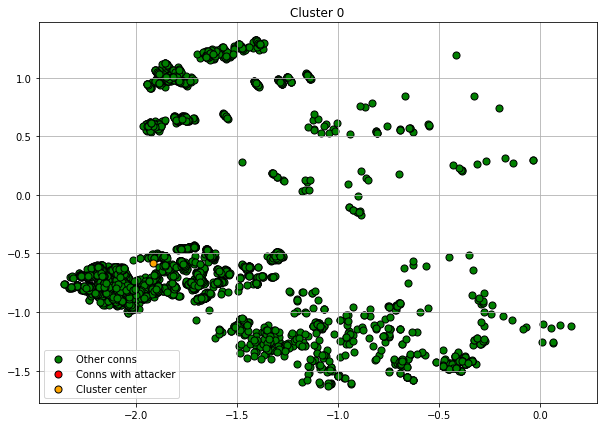

Total num of conns: 10192

Attacker conns ratio:
No    10192
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    4342
192.168.10.17    1682
192.168.10.14     759
192.168.10.19     588
192.168.10.5      488
192.168.10.9      443
192.168.10.12     419
192.168.10.16     394
192.168.10.50     364
192.168.10.51     326
192.168.10.25     194
192.168.10.8      191
192.168.10.1        1
188.92.40.81        1
Name: originated_ip, dtype: int64

192.168.10.3     10156
192.168.10.50       21
192.168.10.19       15
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:00:04.302801Z
timestamp max = 2017-07-06T12:29:59.832497Z

Cluster 0 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
7886,CAJk7Tt2Z5uyJeJ51,1.00000,192.168.10.12,0.74843,192.168.10.3,2017-07-06T12:13:39.436873Z,0.45397,0.00113,0.00000,tcp,krb_tcp,RSTR,0.67726,44384,orig_reg_or_dyn,0.00695,1555,0.00001,10,0.00133,88,resp_well_known,0.00000,1554,0.00001,10,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
8671,CHKhGv2834NjvZhls6,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:16:37.437366Z,0.55310,0.03863,0.00003,udp,dns,SF,0.79974,52410,orig_reg_or_dyn,0.00066,148,0.00000,2,0.00079,53,resp_53,0.00000,266,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3212,Czsp8O3mjH03ZcKNN3,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:25:10.559956Z,0.83887,0.00040,0.00000,udp,dns,SF,0.75724,49625,orig_reg_or_dyn,0.00038,86,0.00000,2,0.00079,53,resp_53,0.00000,228,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3221,CSmERD3OROveUasNCb,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:23:02.530224Z,0.76757,0.00017,0.00000,udp,dns,SF,0.90887,59561,orig_reg_or_dyn,0.00037,82,0.00000,2,0.00079,53,resp_53,0.00000,114,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
4742,CcQdWC37WsiiOHr7s7,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:14:08.024325Z,0.46989,0.06098,0.00005,udp,dns,SF,0.51541,33778,orig_reg_or_dyn,0.00025,56,0.00000,2,0.00079,53,resp_53,0.00000,476,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
662,ChGYox2JrE4VGUBX08,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:25:10.614117Z,0.83890,0.00020,0.00000,udp,dns,SF,0.05675,3722,orig_reg_or_dyn,0.00043,96,0.00000,2,0.00079,53,resp_53,0.00000,180,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
7643,CGgr061XxfMpXe6ck4,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:29:17.226519Z,0.97625,0.02371,0.00002,udp,dns,SF,0.86009,56365,orig_reg_or_dyn,0.00035,78,0.00000,2,0.00079,53,resp_53,0.00000,134,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
8091,C5INUP1Dehll24bEfi,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:25:09.990642Z,0.83856,0.00018,0.00000,udp,dns,SF,0.94204,61735,orig_reg_or_dyn,0.00034,76,0.00000,2,0.00079,53,resp_53,0.00000,172,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
14970,CXdj4a28Vq57OEPAVb,1.00000,192.168.10.8,0.74843,192.168.10.3,2017-07-06T12:01:09.43866Z,0.03628,0.00022,0.00000,udp,dns,SF,0.93139,61037,orig_reg_or_dyn,0.00045,100,0.00000,2,0.00079,53,resp_53,0.00000,200,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
27,CAmjZKYL4Jv6JIVD7,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:29:10.137503Z,0.97230,0.12182,0.00009,udp,dns,SF,0.68872,45135,orig_reg_or_dyn,0.00030,68,0.00000,2,0.00079,53,resp_53,0.00000,224,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     9926
tcp      260
icmp       6
Name: protocol, dtype: int64

Service:
dns                   9603
ntp                    167
none                   140
krb                    120
krb_tcp                110
dce_rpc                 34
krb,smb,gssapi          11
smb,gssapi,dce_rpc       3
ntlm,gssapi,smb          2
smb,gssapi               2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    9983
orig_well_known     209
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            9557
resp_well_known     431
resp_123            167
resp_dyn             20
resp_reg             17
Name: resp_p_cat, dtype: int64




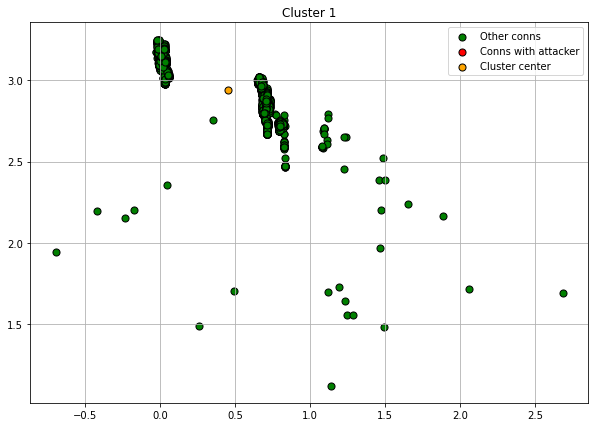

Total num of conns: 4355

Attacker conns ratio:
No    4355
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     4348
192.168.10.17       2
192.168.10.19       2
192.168.10.16       1
192.168.10.50       1
192.168.10.12       1
Name: originated_ip, dtype: int64

192.168.10.1      4310
224.0.0.252         19
192.168.10.255      15
224.0.0.251          2
224.0.1.24           1
192.168.10.51        1
192.168.10.16        1
192.168.10.9         1
192.168.10.50        1
192.168.10.17        1
40.77.224.254        1
192.168.10.19        1
192.168.10.12        1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:00:37.858884Z
timestamp max = 2017-07-06T12:29:59.725635Z

Cluster 1 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
14097,CenAF73FG8nVd7Eljd,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:09:41.091415Z,0.32123,0.02428,0.00002,udp,dns,SF,0.94439,61889,orig_reg_or_dyn,0.00019,43,0.00000,1,0.00079,53,resp_53,0.00000,99,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
17342,CRLODj1yPA4FQIYlo5,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:21:56.219439Z,0.73064,0.09073,0.00007,udp,dns,SF,0.94071,61648,orig_reg_or_dyn,0.00020,44,0.00000,1,0.00079,53,resp_53,0.00000,119,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1613,CJN0hDTxdGZNkoOn2,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:14:32.722582Z,0.48365,0.03048,0.00002,udp,dns,SF,0.95443,62547,orig_reg_or_dyn,0.00021,48,0.00000,1,0.00079,53,resp_53,0.00000,154,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
11341,CI67wp4u8DCuA2ll4g,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:14:05.60506Z,0.46854,0.03524,0.00003,udp,dns,SF,0.94352,61832,orig_reg_or_dyn,0.00026,58,0.00000,1,0.00079,53,resp_53,0.00000,160,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
8656,Cge0oIJhvGeeMy6ha,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:17:29.082385Z,0.58187,0.16126,0.00012,udp,dns,SF,0.92478,60604,orig_reg_or_dyn,0.00020,44,0.00000,1,0.00079,53,resp_53,0.00000,198,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
516,Ceegy98zMNLTBkG71,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:07:02.584071Z,0.23295,0.09846,0.00008,udp,dns,SF,0.92396,60550,orig_reg_or_dyn,0.00019,43,0.00000,1,0.00079,53,resp_53,0.00000,113,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
8994,CsohU82TmLtOstILB1,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:25:07.480594Z,0.83716,0.03103,0.00002,udp,dns,SF,0.91647,60059,orig_reg_or_dyn,0.00035,79,0.00000,1,0.00079,53,resp_53,0.00000,127,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10375,CzBXg01GaimGVEJvr1,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:29:06.489571Z,0.97027,0.07676,0.00006,udp,dns,SF,0.94566,61972,orig_reg_or_dyn,0.00017,39,0.00000,1,0.00079,53,resp_53,0.00000,249,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
19214,CHjswaiPWsjjtboha,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:20:11.568725Z,0.67236,0.06888,0.00005,udp,dns,SF,0.94926,62208,orig_reg_or_dyn,0.00021,48,0.00000,1,0.00079,53,resp_53,0.00000,188,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10570,CXWZBb7VV5dEaM0fi,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:29:44.66417Z,0.99153,0.04792,0.00004,udp,dns,SF,0.94558,61967,orig_reg_or_dyn,0.00018,40,0.00000,1,0.00079,53,resp_53,0.00000,56,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    4354
tcp       1
Name: protocol, dtype: int64

Service:
dns     4350
none       4
ntp        1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4331
orig_well_known      24
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            4309
resp_well_known      23
resp_reg             21
resp_443              1
resp_123              1
Name: resp_p_cat, dtype: int64




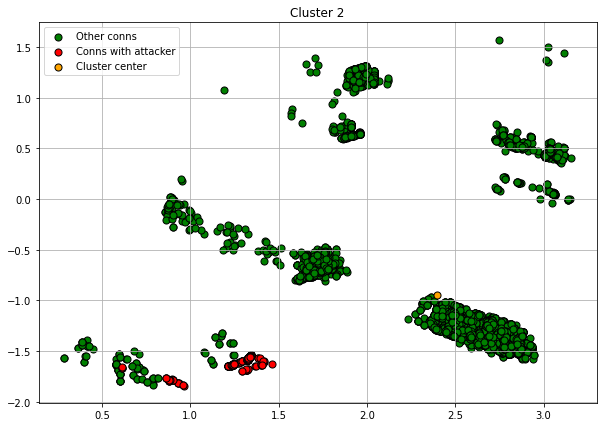

Total num of conns: 7329

Attacker conns ratio:
No     7025
Yes     304
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    1773
192.168.10.17    1464
192.168.10.19     755
192.168.10.14     466
192.168.10.16     464
192.168.10.5      455
192.168.10.12     392
192.168.10.51     372
172.16.0.1        304
192.168.10.9      301
192.168.10.25     283
192.168.10.50     160
192.168.10.8      135
192.168.10.3        5
Name: originated_ip, dtype: int64

192.168.10.50      404
23.50.75.27        140
72.21.91.29        126
192.168.10.255     103
178.255.83.1        82
                  ... 
104.28.1.241         1
52.84.26.246         1
104.20.3.12          1
161.170.236.122      1
151.101.128.207      1
Name: responded_ip, Length: 1191, dtype: int64

Time:
timestamp min = 2017-07-06T12:00:17.561432Z
timestamp max = 2017-07-06T12:29:59.8716Z

Cluster 2 NOK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
11738,C8QUMs2n0pEYnpb4Bd,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:28:48.450647Z,0.96022,5.63059,0.00434,tcp,none,SF,0.78146,51212,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,3,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
20364,CLUOBU2HkO47c1WUy7,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:27:43.588117Z,0.92410,5.47359,0.00422,tcp,none,SF,0.76623,50214,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
14886,C0ycBR7vaSiIAJWck,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:24:55.091455Z,0.83026,5.92709,0.00457,tcp,none,SF,0.72667,47622,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
4268,CmppmT1bO0bknn9kZb,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:29:34.48372Z,0.98586,5.60631,0.00432,tcp,none,SF,0.79217,51914,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
5927,C897ArKW0nX6MIZij,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:27:04.366062Z,0.90226,5.68741,0.00439,tcp,none,SF,0.75701,49610,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
19050,CaI9Hy4Pd1nhL8VkC,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:24:38.402936Z,0.82097,5.60942,0.00433,tcp,none,SF,0.72271,47362,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
16947,CanW81W0uVCJy3I1j,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:27:57.631608Z,0.93192,5.43228,0.00419,tcp,none,SF,0.76953,50430,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
18931,C7FVBhCYmRDE3ZmN6,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:26:54.282564Z,0.89664,5.76874,0.00445,tcp,none,SF,0.75460,49452,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
19543,COugr34o5wS9ljYbo9,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:29:07.757992Z,0.97098,5.32805,0.00411,tcp,none,SF,0.78591,51504,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
20512,CuvYFk2nmCkLMmI752,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:21:31.275399Z,0.71675,5.84856,0.00451,tcp,none,SF,0.68260,44734,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes


Cluster 2 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
3169,Ccm5gr2N8J8iCDSkxd,1.00000,192.168.10.50,0.80310,206.108.0.132,2017-07-06T12:26:52.448717Z,0.89562,0.02897,0.00002,udp,ntp,SF,0.00183,123,orig_well_known,0.00021,48,0.00000,1,0.00186,123,resp_123,0.00000,48,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
15046,Cm4tug3wDCxNg1MF7a,1.00000,192.168.10.17,0.66976,172.217.3.97,2017-07-06T12:25:11.186929Z,0.83922,5.88337,0.00454,tcp,ssl,SF,0.55848,36600,orig_reg_or_dyn,0.00284,635,0.00001,8,0.00675,443,resp_443,0.00000,168,0.00000,6,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
865,CUBgD63Q4p4exRzZZ2,1.00000,192.168.10.15,0.58457,151.101.209.42,2017-07-06T12:24:08.682826Z,0.80441,121.55653,0.09374,tcp,ssl,SF,0.77589,50847,orig_reg_or_dyn,0.00792,1772,0.00003,30,0.00675,443,resp_443,0.00001,21128,0.00002,33,0.00000,0.00000,0.00000,1.00000,0.03947,No,No
15830,Cv4cD63aVeBJ63UXW7,1.00000,192.168.10.15,0.60525,156.154.200.36,2017-07-06T12:14:30.416664Z,0.48236,0.91324,0.00070,tcp,ssl,SF,0.76771,50311,orig_reg_or_dyn,0.00549,1228,0.00001,11,0.00675,443,resp_443,0.00000,4833,0.00001,13,0.00000,0.00000,0.00000,1.00000,0.05263,No,No
5881,CQnJZm3xyB7U9wwuRi,1.00000,192.168.10.15,0.12519,35.186.244.130,2017-07-06T12:14:33.041218Z,0.48382,117.72925,0.09079,tcp,http,SF,0.76809,50336,orig_reg_or_dyn,0.00746,1669,0.00002,21,0.00121,80,resp_80,0.00000,903,0.00001,19,0.00000,0.00000,1.00000,0.00000,0.03947,No,No
1652,CQKv5x1a3G37iMrPn8,1.00000,192.168.10.15,0.07541,23.50.75.27,2017-07-06T12:08:12.942945Z,0.27214,5.30249,0.00409,tcp,none,SF,0.75893,49736,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
23,CMYX523KYu5J92oKJc,1.00000,192.168.10.17,0.26957,72.21.91.29,2017-07-06T12:29:10.844478Z,0.97270,5.22063,0.00403,tcp,none,SF,0.82109,53809,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
10339,C2wQi63RoPVTLI4Do4,1.00000,192.168.10.14,0.19111,52.84.40.37,2017-07-06T12:14:56.21274Z,0.49673,116.16987,0.08959,tcp,ssl,SF,0.90470,59288,orig_reg_or_dyn,0.00323,722,0.00002,22,0.00675,443,resp_443,0.00000,5613,0.00001,21,0.00000,0.00000,0.00000,1.00000,0.03947,No,No
18667,CVjw7b1Go68heFcbmg,1.00000,192.168.10.16,0.34763,91.189.89.199,2017-07-06T12:11:57.074016Z,0.39696,0.09704,0.00007,udp,ntp,SF,0.00183,123,orig_well_known,0.00021,48,0.00000,1,0.00186,123,resp_123,0.00000,48,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
17687,CzHSZxxmtz9kwo1rc,1.00000,192.168.10.5,0.24230,65.55.242.254,2017-07-06T12:01:32.202047Z,0.04895,3.85123,0.00297,tcp,ssl,SF,0.75048,49182,orig_reg_or_dyn,0.07669,17149,0.00002,20,0.00675,443,resp_443,0.00000,14119,0.00001,20,0.00000,0.00000,0.00000,1.00000,0.02632,No,No


Protocol:
tcp    5725
udp    1604
Name: protocol, dtype: int64

Service:
ssl                   2849
http                  1732
ntp                   1425
none                  1135
dns                     90
ssh                     32
ftp-data                30
ftp                     30
smb,gssapi,dce_rpc       6
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    5824
orig_well_known    1505
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           2983
resp_80            2614
resp_123           1425
resp_well_known     130
resp_reg            105
resp_22              34
resp_21              30
resp_dyn              8
Name: resp_p_cat, dtype: int64




In [87]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.scatter(
        kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster center'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Evaluation

**Rand index** *can't be used, requires labels.. (https://scikit-learn.org/stable/modules/clustering.html#rand-index)*


Notation: set `S = {1, 2, .. n}` of `x > 2` points, distance function `d(i,j)` measures distance between 2 points from S (d can be Euclidean, Manhattan, Chebyshev, Mahalanobis, .. alternatively similarity function can be used)


#### 3 axioms of Jon Kleinberg: 

- characteristics that a grouping problem shuld exhibit and can be considered "good", independently of alg used to find solution

1. **scale invariance**: `f(d) == f(alfa*d)` for any d and alfa > 0

2. **consistency**: if for every (i,j) from same cluster `d(i,j) >= d'(i,j)` and from different clusters `d(i,j) < d'(i,j)` then `f(d) == f(d')`

3. **wealth, richness**: every partition of S is a possible result of the clustering process

For every n >= 2 there is no clustering alg. that satysfies all three at once. 

2 measure of internal metrics: 

**cohesion** = between points in same cluster

**separation** = between points from different clusters



### Sum of Squared Error (SSE) 

(https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure)

Elbow Criterion 

- not available as a function in Scikit (we need to calculate SSE to evaluate K-Means using Elbow Criterion)

**Idea of Elbow Criterion method: choose `k` (number of cluster) at which the SSE decreases abruptly.**

(Small values indicate good quality.)

SSE = sum of squared distance between each member of the cluster and its centroid

SSE tends to decrease toward 0 as we increase k (SSE=0, when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

=> goal: choose a small value of k that still has a low SSE, and the elbow usually represents, where we start to have diminishing returns by increasing k

If the line graph looks like an arm, the "elbow" on the arm is the value of optimal k (number of cluster). 

## Metrics that quantify level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

Single pass eval:

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

sse = {}
sil = {}
ch = {}
db = {}

from sklearn.cluster import KMeans
from sklearn import metrics

for k in range(2, len(computed_clusters)):
# for k in range(OPTIMAL_K, OPTIMAL_K + 1):
    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    km = computed_clusters[k]
    km_fit = computed_clusters_fitted[k]
    
    print('K=' + str(k + 1) + ' clusters: ')
    
    sse_score = km_fit.inertia_   
    sse[k] = sse_score
    print('Sum of Squared Error for k = ' + str(k + 1) + ': ' + str(sse_score))
    
    ch_score = metrics.calinski_harabasz_score(pca_X, km_fit.labels_)
    ch[k] = ch_score
    print('Calisnki-Harabasz Coefficient for k = ' + str(k + 1) + ': ' + str(ch_score))
    
    db_score = davies_bouldin_score(pca_X, km_fit.labels_)
    db[k] = db_score
    print('Davies-Bouldin Index for k = ' + str(k + 1) + ': ' + str(db_score))
    
    sil_score = metrics.silhouette_score(pca_X, km.labels_, metric='euclidean')
    sil[k] = sil_score
    print('Silhouette Score for k = ' + str(k + 1) + ': ' + str(sil_score))
    
    print('End at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    print('--')

Start at 00:32:34.
K=3 clusters: 
Sum of Squared Error for k = 3: 107239.6062529845
Calisnki-Harabasz Coefficient for k = 3: 24581.237142153528
Davies-Bouldin Index for k = 3: 0.7800814061822919
Silhouette Score for k = 3: 0.49950209792738326
End at 00:32:41.
--
Start at 00:32:41.
K=4 clusters: 
Sum of Squared Error for k = 4: 92342.79262953
Calisnki-Harabasz Coefficient for k = 4: 20758.929639113903
Davies-Bouldin Index for k = 4: 0.9668012431439446
Silhouette Score for k = 4: 0.4842848431779502
End at 00:32:48.
--
Start at 00:32:48.
K=5 clusters: 
Sum of Squared Error for k = 5: 85203.91143266734
Calisnki-Harabasz Coefficient for k = 5: 17841.387154939235
Davies-Bouldin Index for k = 5: 0.8146845720700187
Silhouette Score for k = 5: 0.49161444044938135
End at 00:32:55.
--
Start at 00:32:55.
K=6 clusters: 
Sum of Squared Error for k = 6: 76302.0286839709
Calisnki-Harabasz Coefficient for k = 6: 15789.894199483368
Davies-Bouldin Index for k = 6: 1.5186984358943645
Silhouette Score for 

In [41]:
sse

{2: 107239.6062529845,
 3: 92342.79262953,
 4: 85203.91143266734,
 5: 76302.0286839709,
 6: 68080.67695078641,
 7: 64298.4101812769,
 8: 61683.29039113191,
 9: 56111.85345486047,
 10: 53766.35916128134,
 11: 48764.413127668384,
 12: 45991.157592801464,
 13: 44530.16402016773,
 14: 43306.24177790214,
 15: 42302.18936369804,
 16: 41430.99808562405,
 17: 39603.32448293676,
 18: 39192.09143344524,
 19: 37896.39396824045,
 20: 37742.81728822337,
 21: 35780.77955750668,
 22: 36656.86440728488,
 23: 35778.53501264018}

In [42]:
ch

{2: 24581.237142153528,
 3: 20758.929639113903,
 4: 17841.387154939235,
 5: 15789.894199483368,
 6: 15713.22764055968,
 7: 14066.194385565084,
 8: 13334.245579631184,
 9: 13161.995853761598,
 10: 12451.768675947076,
 11: 12727.7508451275,
 12: 12150.720886379017,
 13: 11542.188001152317,
 14: 11053.694995807526,
 15: 10585.698404783072,
 16: 10149.132184965456,
 17: 10034.106675886416,
 18: 9581.742435736334,
 19: 9412.014961876808,
 20: 8936.936102334803,
 21: 9009.865643165964,
 22: 8381.839064758757,
 23: 8234.480742562095}

In [43]:
db

{2: 0.7800814061822919,
 3: 0.9668012431439446,
 4: 0.8146845720700187,
 5: 1.5186984358943645,
 6: 1.299612680122102,
 7: 1.3218414076172524,
 8: 1.4680719975183132,
 9: 1.206330139908418,
 10: 1.228797368752324,
 11: 1.1873376891011016,
 12: 1.1772535888916114,
 13: 1.253898567853897,
 14: 1.2154604153415611,
 15: 1.2392287765512955,
 16: 1.2445199930948803,
 17: 1.228570909179921,
 18: 1.234595893935219,
 19: 1.3247961533654387,
 20: 1.295359523122279,
 21: 1.2821912385100123,
 22: 1.26574955580063,
 23: 1.2535262301860175}

In [44]:
sil

{2: 0.49950209792738326,
 3: 0.4842848431779502,
 4: 0.49161444044938135,
 5: 0.3244883239525387,
 6: 0.3571359113870087,
 7: 0.35699728200265546,
 8: 0.34691089417414284,
 9: 0.37857911920498394,
 10: 0.37710856513106267,
 11: 0.39144904472142855,
 12: 0.40162995081014186,
 13: 0.4072471648331312,
 14: 0.3973177560511421,
 15: 0.4096741841638317,
 16: 0.40919445421781325,
 17: 0.42994824525718667,
 18: 0.41845709410335696,
 19: 0.403489543033116,
 20: 0.40799477220687447,
 21: 0.41747929586071075,
 22: 0.41039040942907584,
 23: 0.40398106660074196}

In [45]:
# 1: clusters are clearly distinguished
# 0: distance between clusters is not significant ('data are uniformly distributed throughout Euclidean space')
# -1: clusters are assigned the wrong way

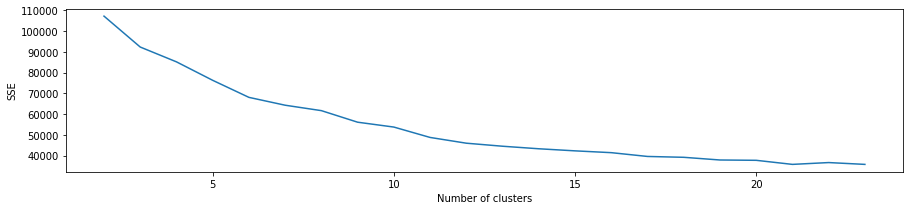

In [46]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
# plt.rcParams["figure.figsize"] = (15,3)
# plt.figure()
# sse_to_10 = { k: v for k, v in sse.items() if k <= 10 }  # zoom in
# plt.plot(list(sse_to_10.keys()), list(sse_to_10.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("SSE")
# plt.show()

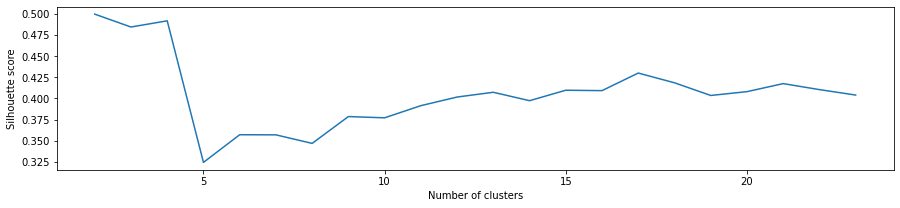

In [48]:
plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

## Interpretation

Parallel coordinates plots.

In [49]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

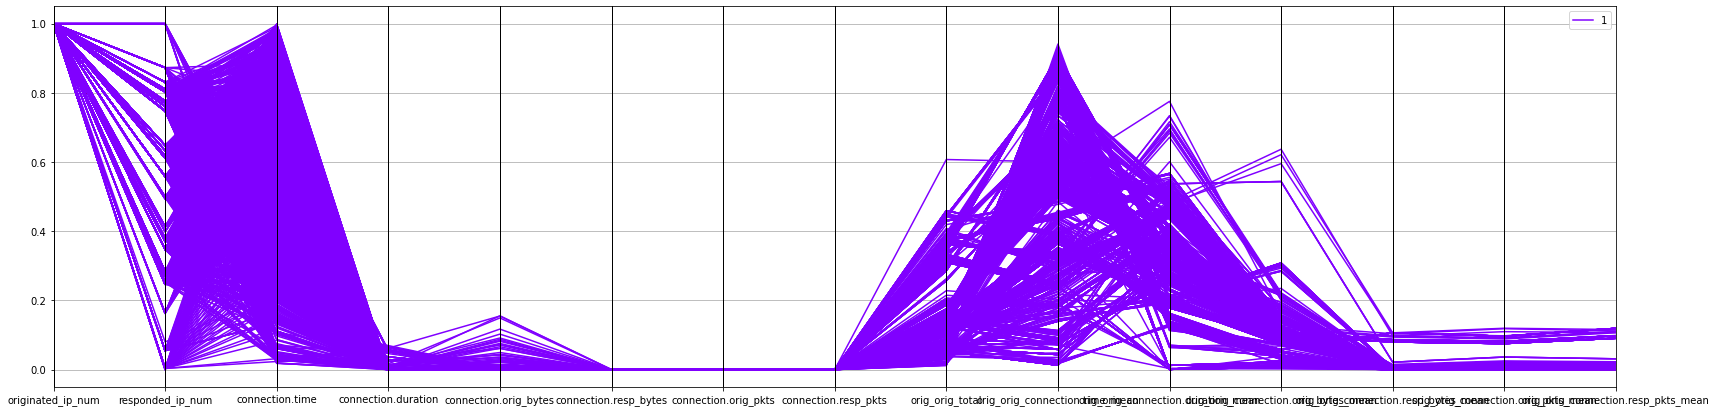

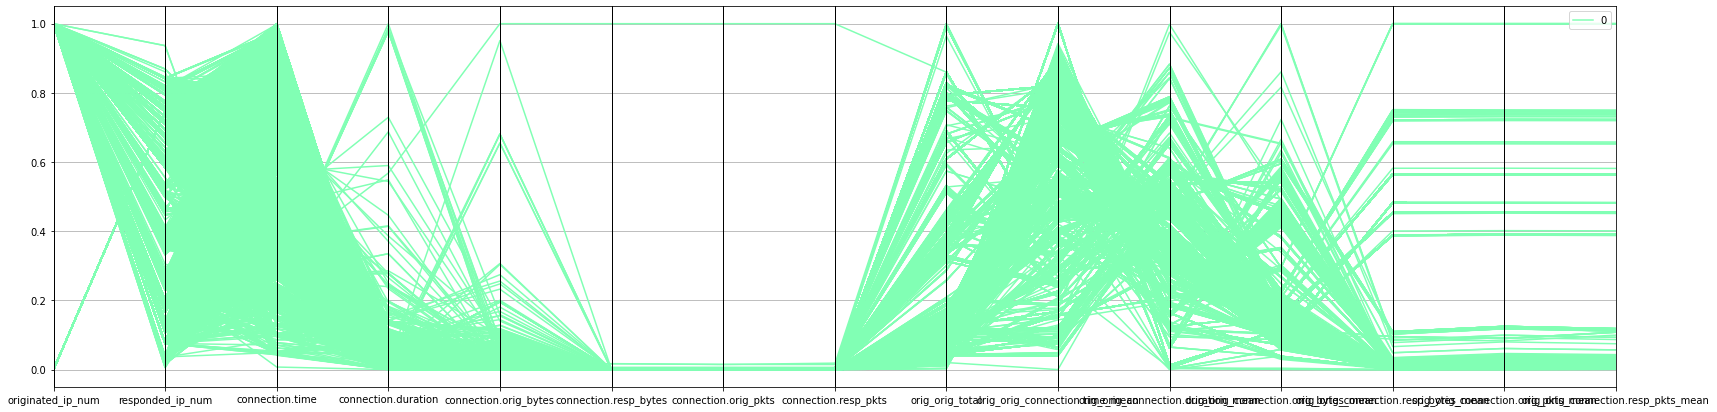

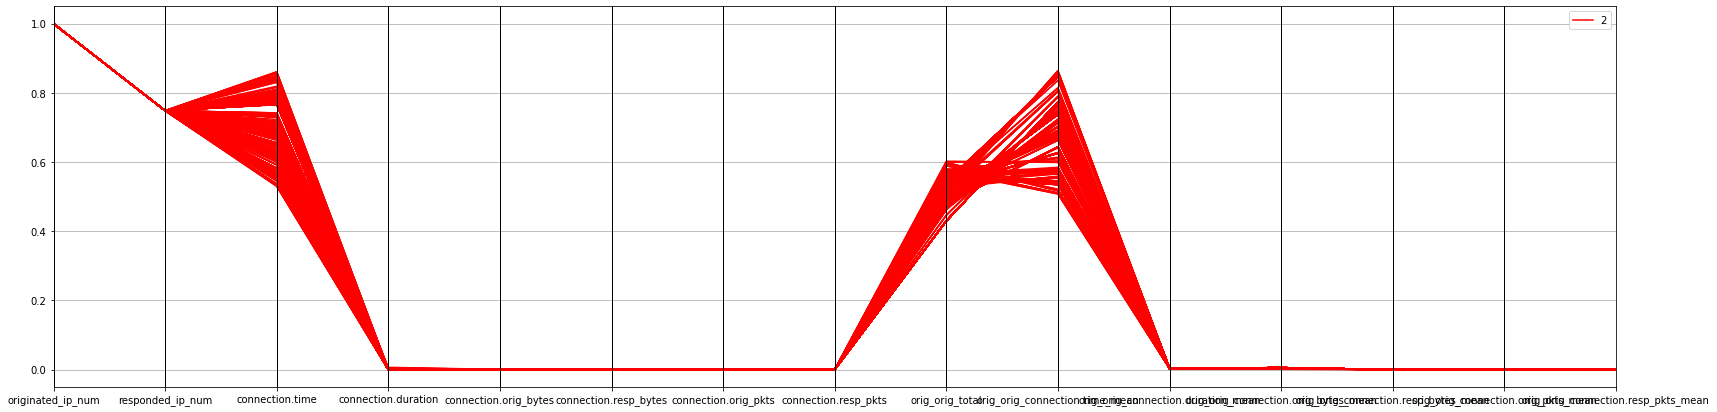

In [88]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

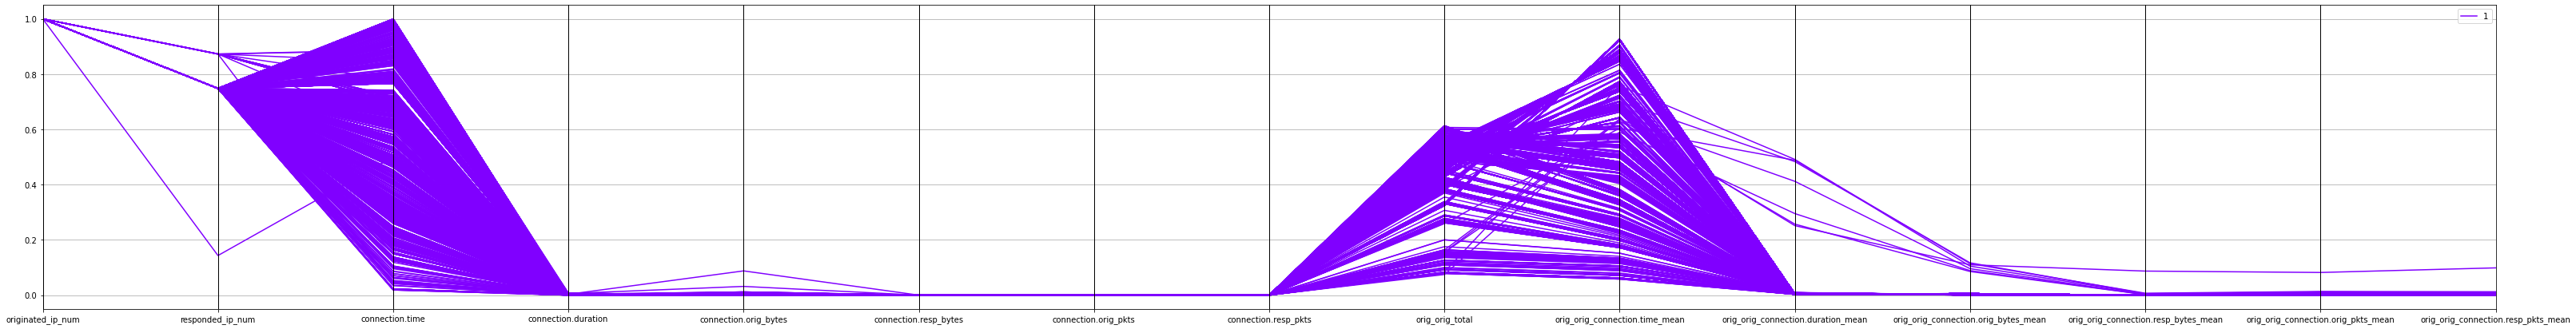

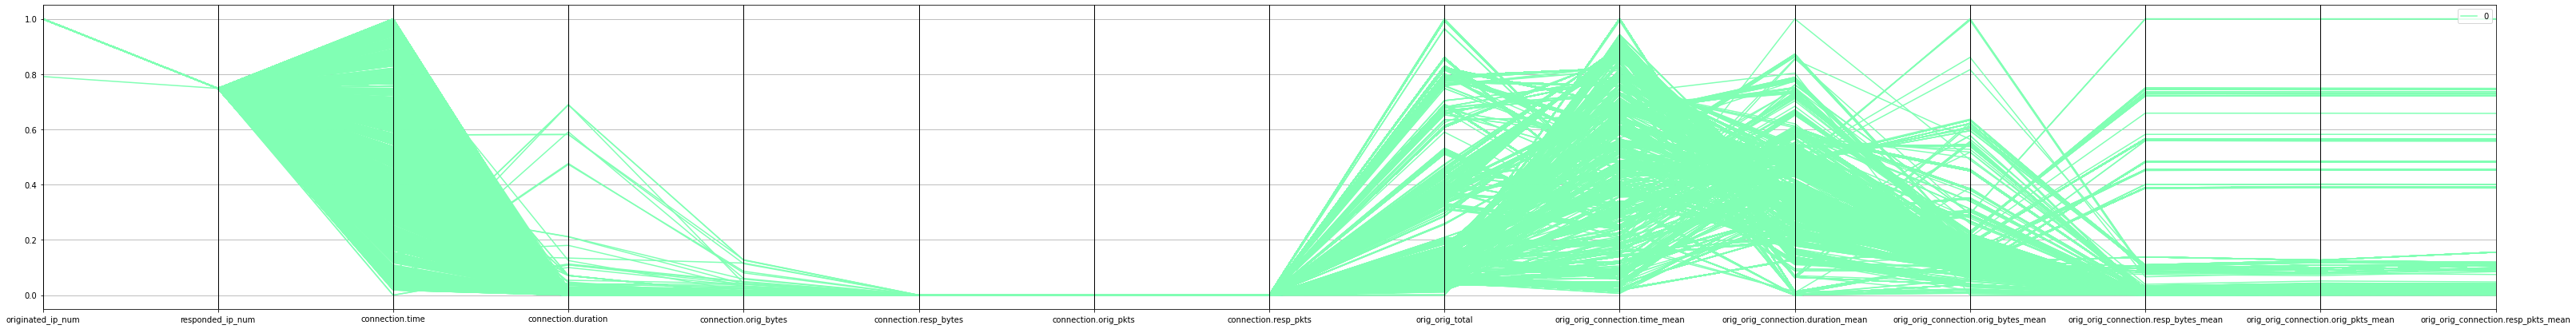

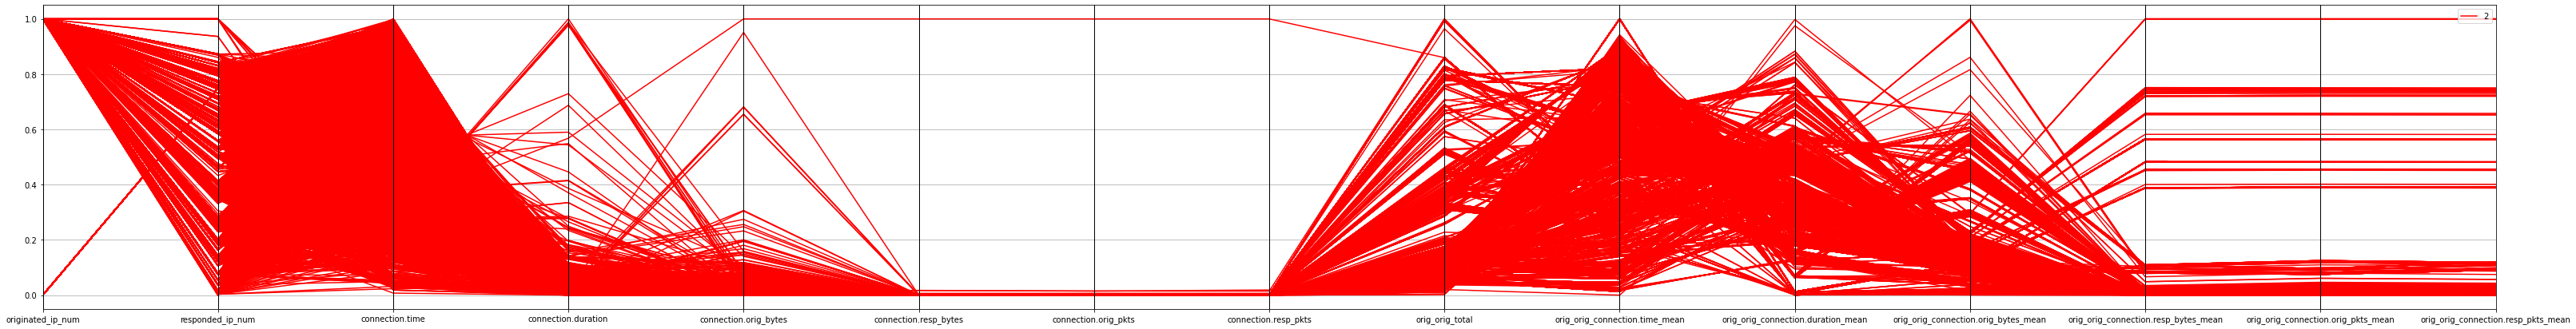

In [89]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()